In [37]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Classification

In [38]:
fmnist_data = keras.datasets.fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fmnist_data.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

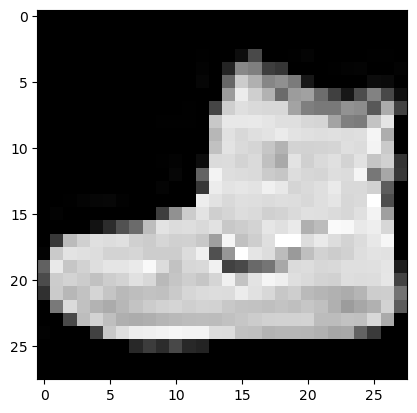

In [8]:
plt.imshow(x_train[0,], cmap="gray")

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(75, activation="relu"))
model.add(keras.layers.Dense(10, activation="relu"))

/home/saeed/repositories/machine-learning/tensorflow-course/start-tensorflow/envs/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-03-02 11:42:13.081672: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


# Define Model

In [10]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(10, activation="relu")
    ])

In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 75)             │         7,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           760 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,835 (339.20 KB)

 Trainable params: 86,835 (339.20 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [13]:
weights, bias = model.layers[1].get_weights()

In [14]:
weights.shape

(784, 100)

In [15]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

# Compile Model

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# Fit Modelm

In [17]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0978 - loss: 2.6229 - val_accuracy: 0.1034 - val_loss: 2.3054
Epoch 2/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0994 - loss: 2.3044 - val_accuracy: 0.1034 - val_loss: 2.3054
Epoch 3/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.0989 - loss: 2.3055 - val_accuracy: 0.1034 - val_loss: 2.3054
Epoch 4/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.0990 - loss: 2.3047 - val_accuracy: 0.1034 - val_loss: 2.3054
Epoch 5/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.0995 - loss: 2.3045 - val_accuracy: 0.1034 - val_loss: 2.3054
Epoch 6/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1000 - loss: 2.3050 - val_accuracy: 0.1034 - val_loss: 2.3054
Epoch 7/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.0962 - loss: 2.3037 - val_accuracy: 0.1034 - val_loss: 2.3054
Epoch 8/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.0990 - loss: 2.3042 

In [18]:
history.history

{'accuracy': [0.09919607639312744,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,
  0.09933333098888397,

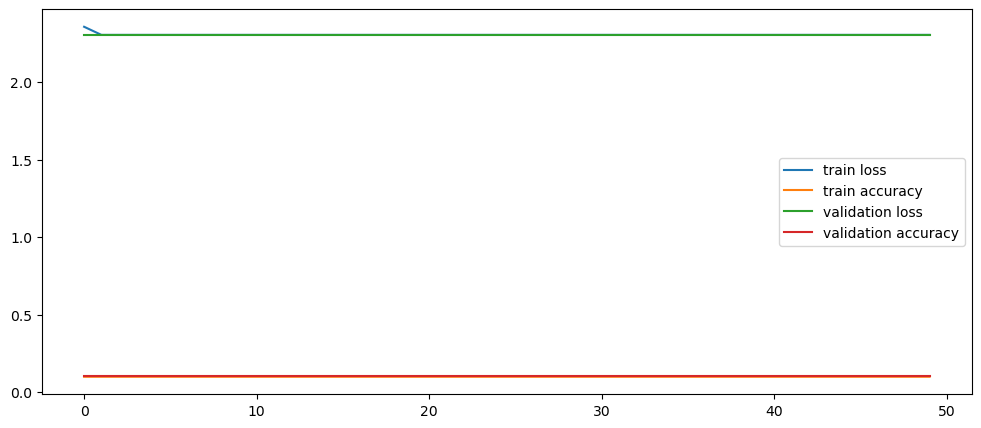

In [22]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(history.history["loss"], label="train loss")
ax.plot(history.history["accuracy"], label="train accuracy")
ax.plot(history.history["val_loss"], label="validation loss")
ax.plot(history.history["val_accuracy"], label="validation accuracy")
ax.legend()

In [24]:
model.evaluate(x_test, y_test, verbose=0)

[2.3067357540130615, 0.09989999979734421]

In [29]:
x3 = x_test[1:3,:,:]
x3.shape

(2, 28, 28)

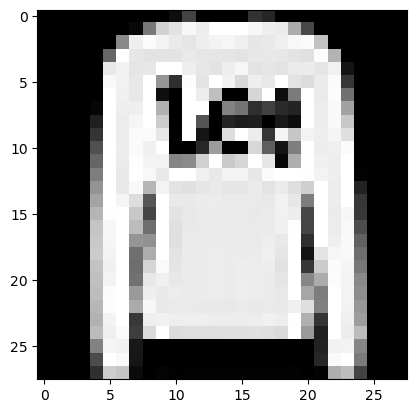

In [31]:
plt.imshow(x3[0], cmap="gray")

In [35]:
model.predict(x3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [33]:
model.predict(x3).shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


(2, 10)

In [41]:
np.argmax(model.predict(x3),  axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([0, 0])

In [43]:
 y_test[1:3]

array([2, 1], dtype=uint8)